<a href="https://colab.research.google.com/github/chamuda-arangalla/Face-mask-detection-/blob/main/Face_mask_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Face Mask Detection using CNN**





**1. Persons with mask.**

**2. Persons without mask.**

The model aims to detect whether a person is wearing a mask using a Convolutional Neural Network (CNN). The CNN processes images and classifies them into two categories: "mask" or "no mask" by analyzing visual features learned from the training dataset

Load dataSet


In [1]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

# Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 95% 155M/163M [00:01<00:00, 93.4MB/s]
100% 163M/163M [00:01<00:00, 95.2MB/s]
The dataset is extracted


Import Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['with_mask_3404.jpg', 'with_mask_2216.jpg', 'with_mask_2456.jpg', 'with_mask_3391.jpg', 'with_mask_1884.jpg']
['without_mask_857.jpg', 'without_mask_1827.jpg', 'without_mask_1584.jpg', 'without_mask_476.jpg', 'without_mask_3631.jpg']


In [6]:
# Num of images in each file
print('Num of images with mask= ',len(with_mask_files))
print('Num of images without mask= ',len(without_mask_files))

Num of images with mask=  3725
Num of images without mask=  3828


In [7]:
with_mask_label=[1]*len(with_mask_files)
without_mask_label=[0]*len(without_mask_files)

In [8]:
with_mask_label[0:5]

[1, 1, 1, 1, 1]

In [9]:
without_mask_label[0:5]

[0, 0, 0, 0, 0]

In [10]:
labels=with_mask_label+without_mask_label
print(labels[:5])
print(labels[-5:])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Visualization of data


1. Person wearing a mask

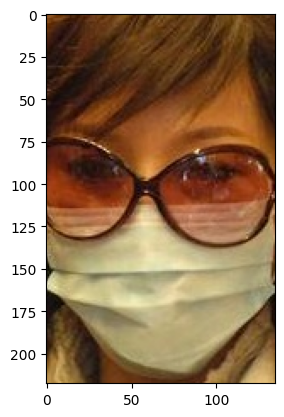

In [11]:
img=mimg.imread('/content/data/with_mask/with_mask_10.jpg')
imgplot=plt.imshow(img)
plt.show()

2. Person without mask

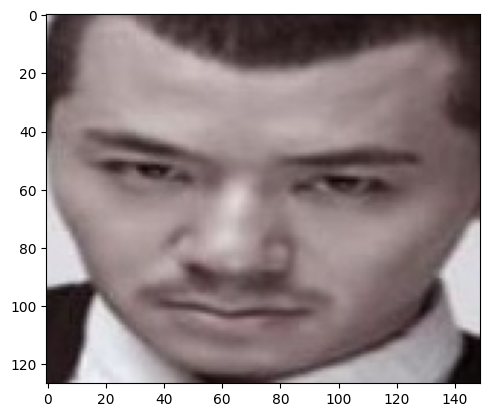

In [12]:
img=mimg.imread('/content/data/without_mask/without_mask_100.jpg')
imgplot=plt.imshow(img)
plt.show()

Image processing

In [13]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [15]:
len(data)

7553

In [16]:
type(data)

list

In [17]:
data[0].shape

(128, 128, 3)

Splitting The Data

In [18]:
X=np.array(data)
Y=np.array(labels)

In [19]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Data Rescaling

In [21]:
x_train_scl=x_train/255
x_test_scl=x_test/255


Build The CNN Model


In [22]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.50))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.50))

model.add(keras.layers.Dense(2,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
Model=model.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7113 - loss: 0.8104 - val_accuracy: 0.8868 - val_loss: 0.2839
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8750 - loss: 0.3120 - val_accuracy: 0.9000 - val_loss: 0.2336
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9078 - loss: 0.2392 - val_accuracy: 0.9103 - val_loss: 0.2108
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9193 - loss: 0.2139 - val_accuracy: 0.9176 - val_loss: 0.2363
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9269 - loss: 0.1898 - val_accuracy: 0.9221 - val_loss: 0.1876
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9436 - loss: 0.1542 - val_accuracy: 0.9147 - val_loss: 0.2082
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9448 - loss: 0.1365 - val_accuracy: 0.9294 - val_loss: 0.2228
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9639 - loss: 0.0932 - val_ac

**Model evaluation**


In [26]:
loss,acc=model.evaluate(x_test_scl,y_test)
print('The Accuracy = ',int(acc*100),'%')

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9205 - loss: 0.2211
The Accuracy =  93 %



**Plotting the Accuracy and Loss Curves**



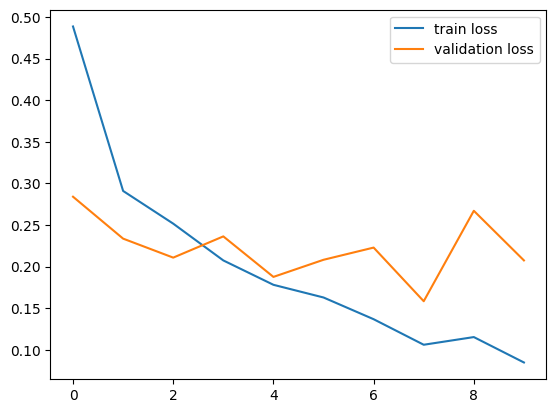

In [27]:
h = Model

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

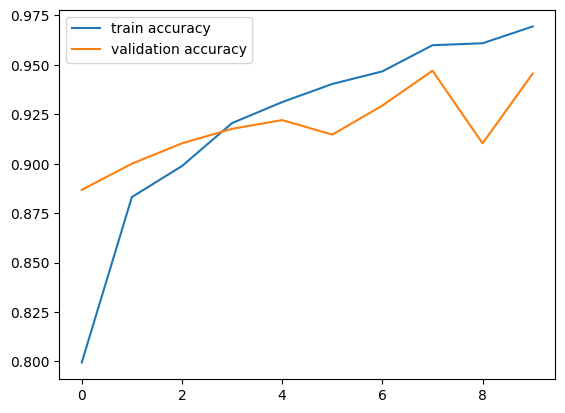

In [28]:
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


**Predction Of Images**



Enter the image path : /content/data/with_mask/with_mask_1026.jpg


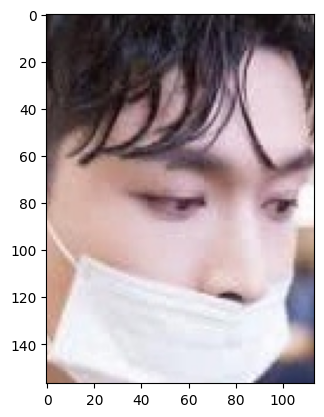

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
[[0.1534015 0.8272829]]
1
The person in the image is wearing a mask


In [29]:
input_image=input("Enter the image path : ")
img=mimg.imread(input_image)
imgplot=plt.imshow(img)
plt.show()
img=cv2.resize(img,(128,128))
img=img/255
img=np.reshape(img,[1,128,128,3])
prediction=model.predict(img)

print(prediction)


input_pred_label = np.argmax(prediction)

print(input_pred_label)


if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')

Enter the image path : /content/data/without_mask/without_mask_1056.jpg


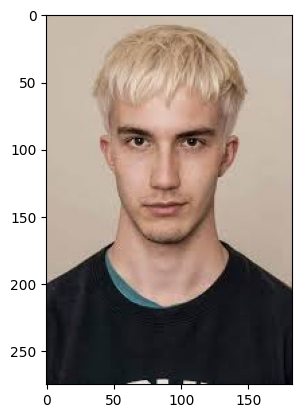

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.9210658  0.04273327]]
0
The person in the image is not wearing a mask


In [31]:
input_image=input("Enter the image path : ")
img=mimg.imread(input_image)
imgplot=plt.imshow(img)
plt.show()
img=cv2.resize(img,(128,128))
img=img/255
img=np.reshape(img,[1,128,128,3])
prediction=model.predict(img)

print(prediction)


input_pred_label = np.argmax(prediction)

print(input_pred_label)


if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')